In [1]:
import numpy as np 
import stan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [2]:
stancode = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}parameters {
  real alpha;
  real beta;
  real <lower=0> sigma;
}
model {
    sigma ~ inv_gamma(1,1);
    alpha ~ normal(0,10);
    beta ~ normal(0,10);
    y ~ normal(alpha +beta*x,sigma); 
}
"""

In [3]:
N = 100
alpha = 2.3
sigma = 2. 
slope = 4. 

x = np.random.normal(size=N)
y = alpha + slope * x + sigma * np.random.normal(size=N)

In [4]:
# Prepare data in Stan friendly format
data_dict = {
    "x":x,
    "y":y,
    "N":N
}

# Compile model
model = stan.build(stancode, data=data_dict)

Building...



Building: 38.0s, done.

In [5]:
# Posterior inference using MCMC
fit = model.sample(num_chains=4, num_warmup=1000, num_samples=2500)

Sampling:   0%
Sampling:  25% (3500/14000)
Sampling:  50% (7000/14000)
Sampling:  75% (10500/14000)
Sampling: 100% (14000/14000)
Sampling: 100% (14000/14000), done.
Messages received during sampling:
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00015 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000101 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
  Adjust your expectations accordingly!


In [6]:
# Posterior summary statistics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.178,0.201,1.807,2.559,0.002,0.001,9693.0,7130.0,1.0
beta,3.805,0.192,3.440,4.168,0.002,0.001,10638.0,7203.0,1.0
sigma,1.972,0.140,1.721,2.249,0.001,0.001,10240.0,7922.0,1.0


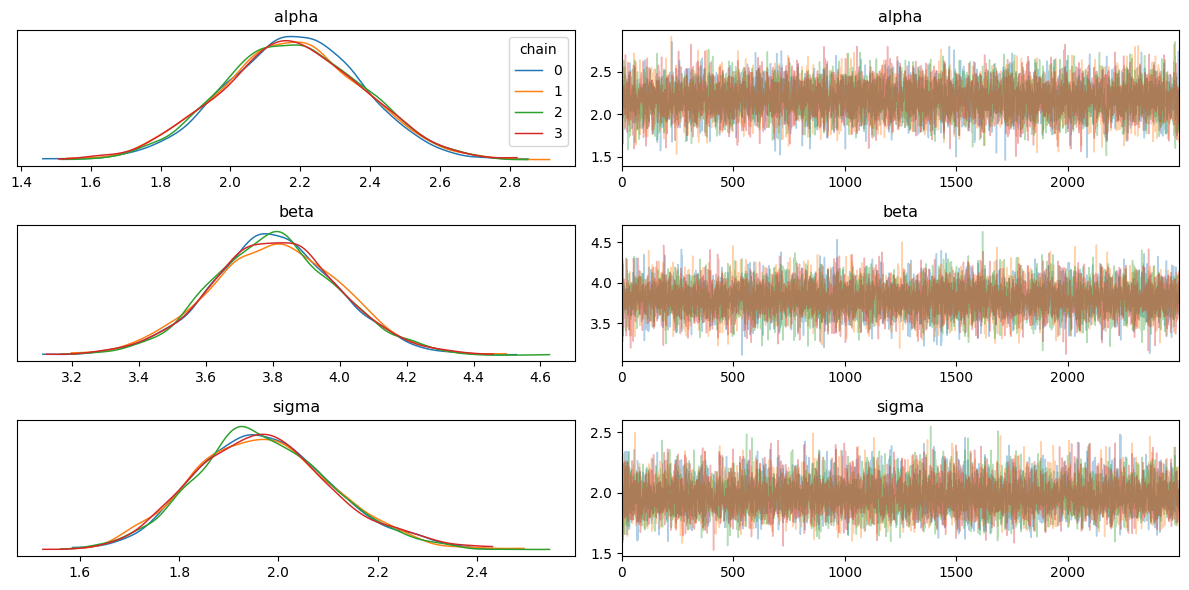

In [7]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

In [ ]:
N = 1000
alpha = 2.3
sigma = 2. 
slope = 4. 

x = np.random.normal(size=N)
y = alpha + slope * x + sigma * np.random.normal(size=N)

In [ ]:
# Prepare data in Stan friendly format
data_dict = {
    "x":x,
    "y":y,
    "N":N
}

# Compile model
model = stan.build(stancode, data=data_dict)

In [ ]:
# Posterior inference using MCMC
fit = model.sample(num_chains=4, num_warmup=1000, num_samples=2500)

In [ ]:
# Posterior summary statistics
az.summary(fit)

In [ ]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()